# Conjoint Analysis

### Importing libraries, downloading data, and convert it to the tidy dataset style for online and offline cases

In [55]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import itertools as it 

In [56]:
columns = ["exterior", "size", "price", "strap_pad", "pocket", "interior"]
cat_features = ["exterior", "size", "strap_pad", "pocket", "interior"]
df_online = pd.read_csv('responses_online_1.csv', header=None)
df_offline = pd.read_csv('responses_offline_1.csv', header=None)
df_design = pd.read_csv('design.csv', header=None, names=columns)

In [57]:
# The fnction to convert datasets to the more useful format

def melt(data: pd.DataFrame) -> pd.DataFrame:
    data['respondent'] = data.index
    return pd.melt(data, 
                   var_name='bag', 
                   value_name='rate', 
                   value_vars=np.arange(20), 
                   id_vars=['respondent'])

In [58]:
# Decoding price and redefining columns names

respondent_bag = melt(df_online)

price_dict = {
    1: 120,
    2: 140,
    3: 160,
    4: 180    
}

names = {
    'exterior_1': 'exterior design: black',
    'exterior_2': 'exterior design: reflective',
    'exterior_3': 'exterior design: colorful',
    'exterior_4': 'exterior design: blue',
    'size_1': 'size: small',
    'size_2': 'size: large',
    'price': 'price',
    'strap_pad_1': 'strap pad: no',
    'strap_pad_2': 'strap pad: yes',
    'pocket_1': 'water bottle pocket: no',
    'pocket_2': 'water bottle pocket: yes',
    'interior_1': 'interior compartment: no dividers',
    'interior_2': 'interior compartment: divider for files',
    'interior_3': 'interior compartment: padded laptop'
}

In [59]:
# One-hot encoding

def get_dummies_and_price(design: pd.DataFrame) -> pd.DataFrame:
    one_hot_design = pd.get_dummies(design, 
                                    drop_first=True,
                                    columns=cat_features, dtype=np.int64)
    one_hot_design["price"] = one_hot_design["price"].apply(lambda x: price_dict[x])                       
    return one_hot_design.rename(columns=names) 

In [60]:
# Dummy coded attributes except price. Price is in $120-$180

bag_attributes_encoded = get_dummies_and_price(df_design)
bag_attributes_encoded['bag'] = bag_attributes_encoded.index
bag_attributes_encoded.head()

,price,exterior design: reflective,exterior design: colorful,exterior design: blue,size: large,strap pad: yes,water bottle pocket: yes,interior compartment: divider for files,interior compartment: padded laptop,bag
0,160,0,0,0,0,0,1,0,0,0
1,140,0,0,1,0,1,1,1,0,1
2,120,0,1,0,0,1,0,1,0,2
3,160,1,0,0,0,1,0,0,0,3
4,160,0,1,0,1,0,1,0,1,4


In [61]:
# Merging our datasets and checking it for possible errors or NA values

online = respondent_bag.merge(bag_attributes_encoded, on='bag', how='inner')
online['bag'] = online['bag'].astype(int)

online.info()
online.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   respondent                               2440 non-null   int64
 1   bag                                      2440 non-null   int32
 2   rate                                     2440 non-null   int64
 3   price                                    2440 non-null   int64
 4   exterior design: reflective              2440 non-null   int64
 5   exterior design: colorful                2440 non-null   int64
 6   exterior design: blue                    2440 non-null   int64
 7   size: large                              2440 non-null   int64
 8   strap pad: yes                           2440 non-null   int64
 9   water bottle pocket: yes                 2440 non-null   int64
 10  interior compartment: divider for files  2440 non-null   int64
 11  inte

,respondent,bag,rate,price,exterior design: reflective,exterior design: colorful,exterior design: blue,size: large,strap pad: yes,water bottle pocket: yes,interior compartment: divider for files,interior compartment: padded laptop
0,0,0,1,160,0,0,0,0,0,1,0,0
1,1,0,1,160,0,0,0,0,0,1,0,0
2,2,0,2,160,0,0,0,0,0,1,0,0
3,3,0,1,160,0,0,0,0,0,1,0,0
4,4,0,3,160,0,0,0,0,0,1,0,0


In [62]:
# Doing the same for offline case

respondent_bag_f = melt(df_offline)
offline = respondent_bag_f.merge(bag_attributes_encoded, on='bag', how='inner')
offline['bag'] = offline['bag'].astype(int)
offline['rate'] = offline['rate'].astype(np.int64)

offline.info()
offline.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   respondent                               2440 non-null   int64
 1   bag                                      2440 non-null   int32
 2   rate                                     2440 non-null   int64
 3   price                                    2440 non-null   int64
 4   exterior design: reflective              2440 non-null   int64
 5   exterior design: colorful                2440 non-null   int64
 6   exterior design: blue                    2440 non-null   int64
 7   size: large                              2440 non-null   int64
 8   strap pad: yes                           2440 non-null   int64
 9   water bottle pocket: yes                 2440 non-null   int64
 10  interior compartment: divider for files  2440 non-null   int64
 11  inte

,respondent,bag,rate,price,exterior design: reflective,exterior design: colorful,exterior design: blue,size: large,strap pad: yes,water bottle pocket: yes,interior compartment: divider for files,interior compartment: padded laptop
0,0,0,1,160,0,0,0,0,0,1,0,0
1,1,0,3,160,0,0,0,0,0,1,0,0
2,2,0,2,160,0,0,0,0,0,1,0,0
3,3,0,1,160,0,0,0,0,0,1,0,0
4,4,0,3,160,0,0,0,0,0,1,0,0


### OLS Estimations online

#### 1) For all users

In [63]:
# Run regression over all objects - estimation of the population average partworths using OLS

X_online = online.drop(['rate', 'respondent', 'bag'], axis=1)
y_online = online['rate']

model = sm.OLS(y_online, sm.add_constant(X_online))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          1.58e-163
Time:                        23:36:49   Log-Likelihood:                -3682.8
No. Observations:                2440   AIC:                             7386.
Df Residuals:                    2430   BIC:                             7444.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

As we can see above, all the coefficients are significant (p-values are less than 0.05). For example, the coefficient on size: large is associated with the incresing of rating by 0.268 if a bag is large. We can highlight the properties of a bag which statistically positively affect the rating: large size, with strap pad, with water bottle pocket, with divider for files, and with padding for a laptop. It is not surprising because this features increase the comfort of using a bag. However, the price and some design elements (especially the color ones) lower the bag's rating. Consumers prefer black bags and are sensitive to price increases. It is also quite intuitive because people tend to wear things in neutral tones such as black, white or gray and not to spend a lot of money on not too important things. 

Some conclusions: online consumers tend to prefer neutral colored not very expensive large bags with functional improvements that increase comfort and convenience (especially for laptops because nowadays a lot of people carry it all times for work, for example).

#### 2) For individual users

In [64]:
# Run regressions for each individual -  estimations of the individual online partworths

Individual_level_OLS = [] # list for OLS result for each respondent

respondents = online.respondent.unique()
Individual_level_OLS = {}

for respondent in respondents:
    X = X_online[online.respondent == respondent] # choose the needed respondent lines in the dataset
    y = y_online[online.respondent == respondent]
    model = sm.OLS(y, sm.add_constant(X))
    results = model.fit()
    Individual_level_OLS[respondent] = results

In [65]:
# Computing metrics to analyze

# Individual_level_params is a table with coefficients for each respondent. 
# Individual_level_std is a table with standard errors for each respondent's coefficients (partworths)

Individual_level_params = pd.DataFrame(index = respondents, 
                                       columns = ['const'] + X_online.columns.tolist()) # creating na dataframe

Individual_level_std = pd.DataFrame(index = respondents, 
                                       columns = ['std_const'] + (['std_'] + X_online.columns).tolist())

for respondent in respondents:
    Individual_level_params.loc[respondent] = Individual_level_OLS[respondent].params  # get params
    Individual_level_std.loc[respondent] = Individual_level_OLS[respondent].bse.tolist() # get params std 

In [66]:
Individual_level_params.head()

,const,price,exterior design: reflective,exterior design: colorful,exterior design: blue,size: large,strap pad: yes,water bottle pocket: yes,interior compartment: divider for files,interior compartment: padded laptop
0,3.673077,-0.018269,0.0,-0.397436,-0.064103,0.6,0.653846,0.4,-0.5,0.230769
1,3.138862,-0.017007,0.25,0.064503,-0.26883,0.1,0.963942,0.7,1.333333,1.39383
2,7.333894,-0.030349,-0.25,-1.354567,-0.354567,0.1,0.257212,0.1,0.5,1.229567
3,2.928846,-0.013462,-0.25,-0.580128,-0.246795,0.9,0.192308,0.3,-0.0,0.288462
4,2.747196,-0.004507,0.0,0.60617,0.439503,-0.3,0.463942,0.3,0.666667,1.060497


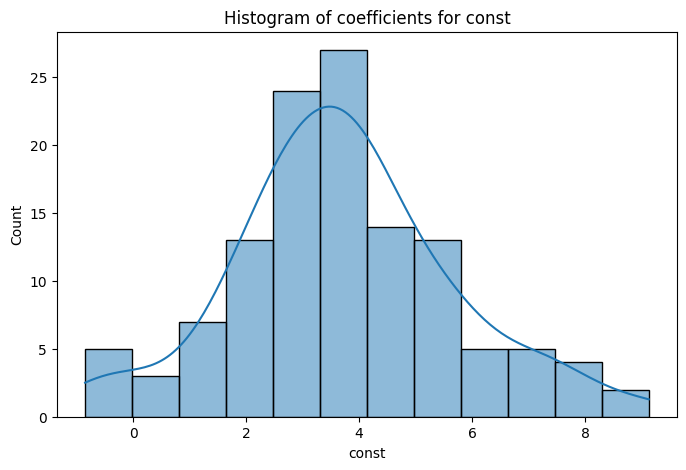

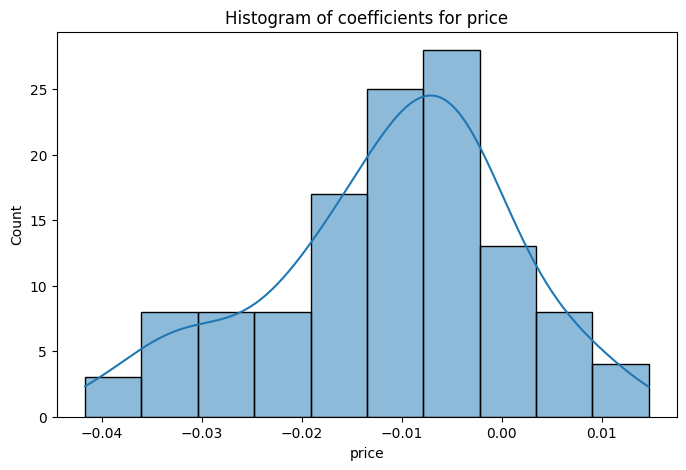

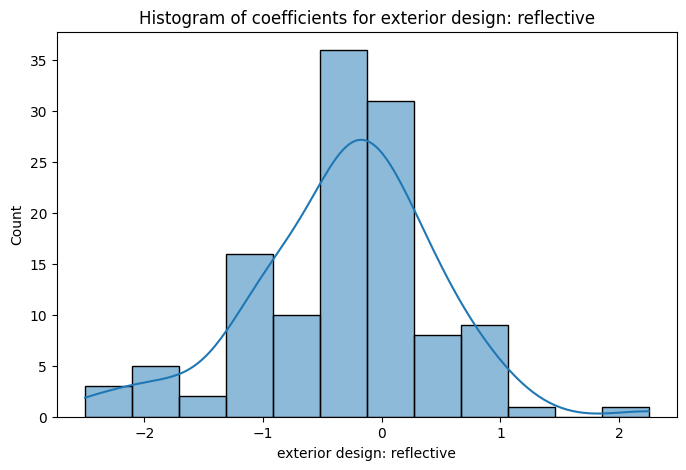

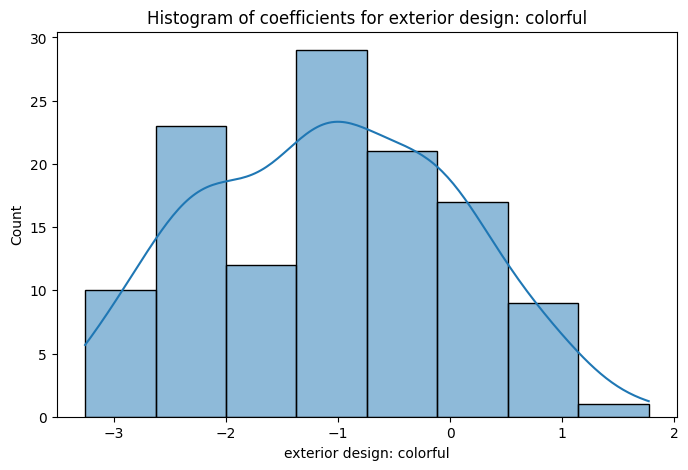

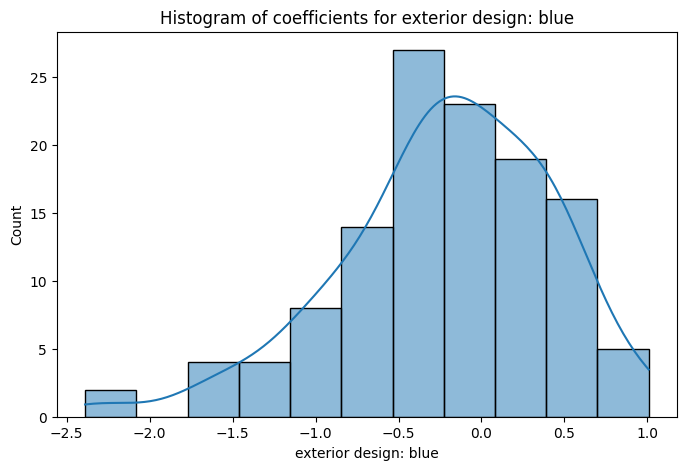

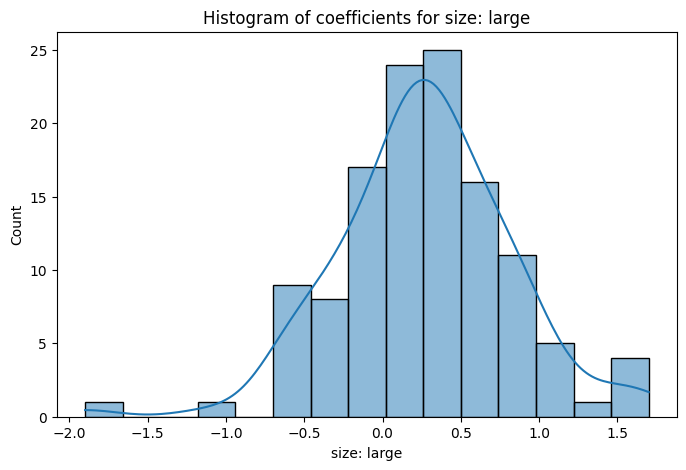

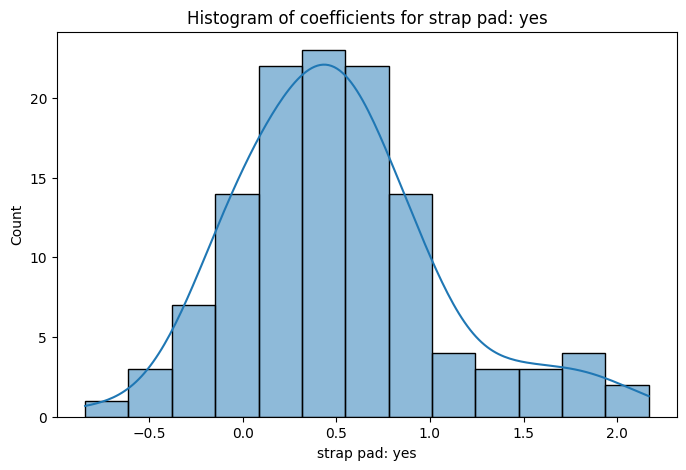

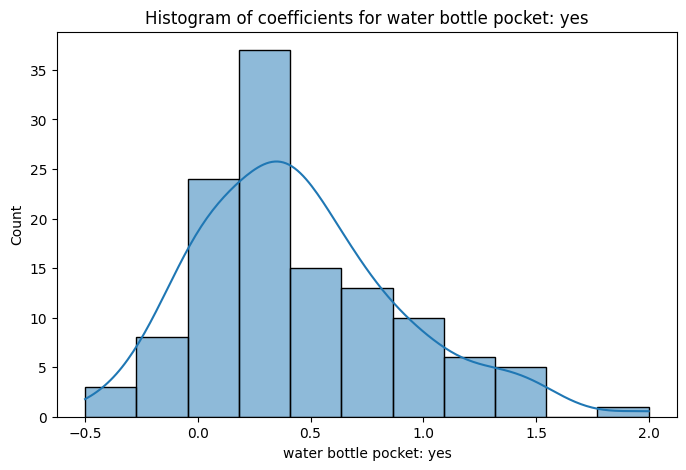

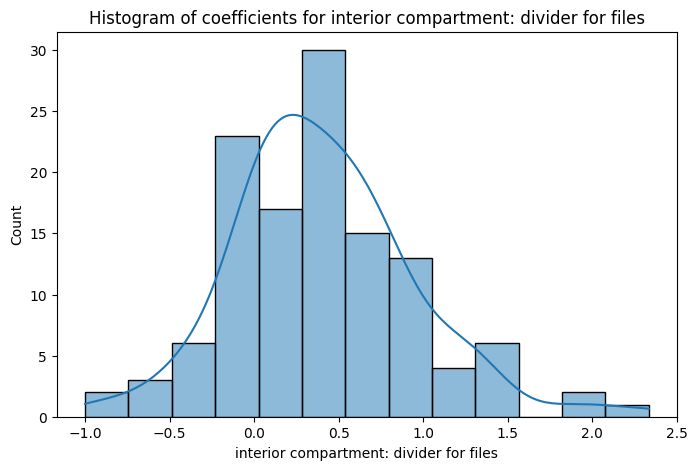

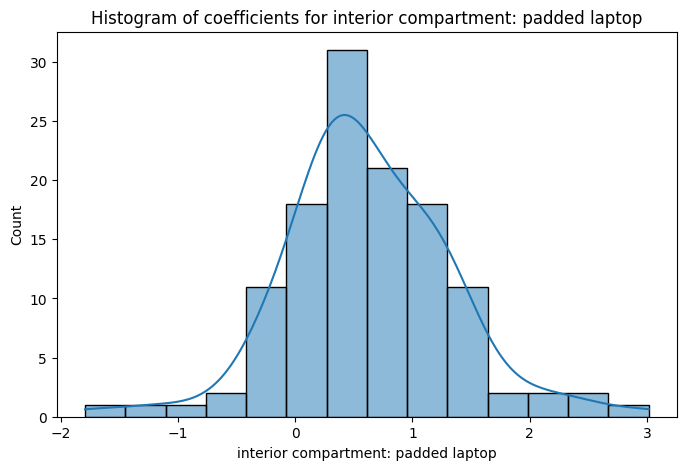

In [67]:
for col in Individual_level_params.columns:
    sns.histplot(Individual_level_params[col], kde=True)
    plt.title(f'Histogram of coefficients for {col}')
    plt.show()

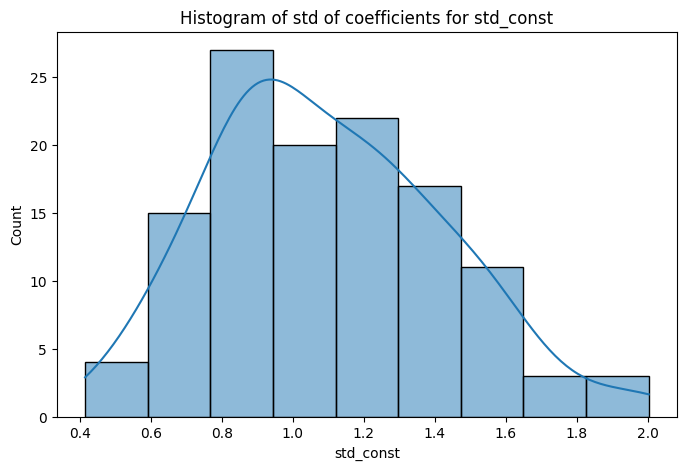

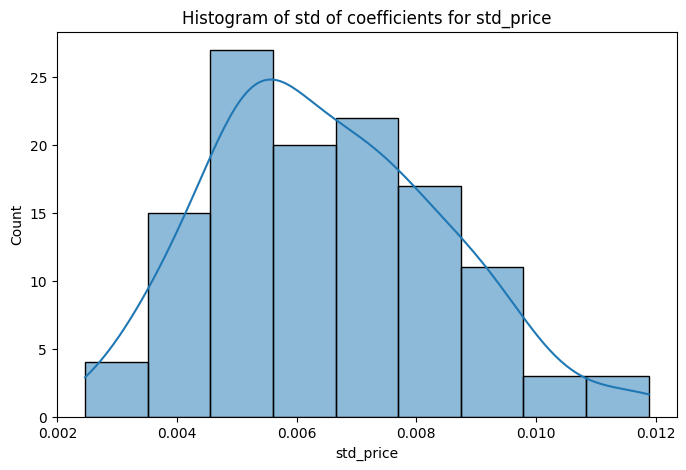

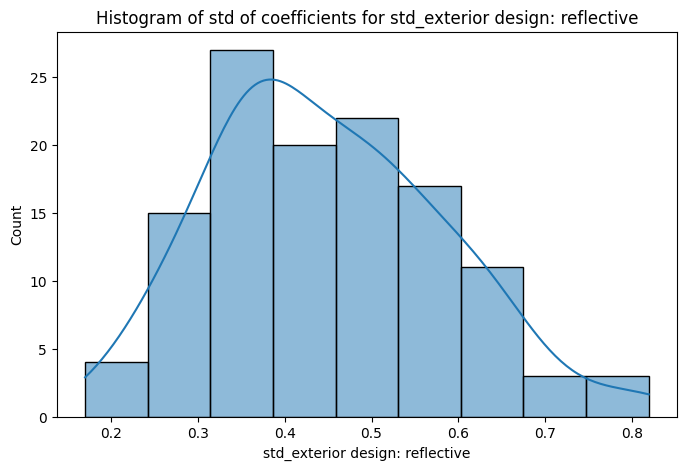

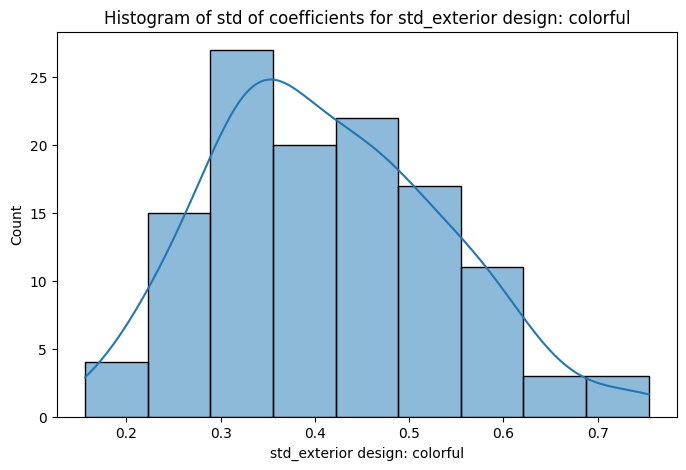

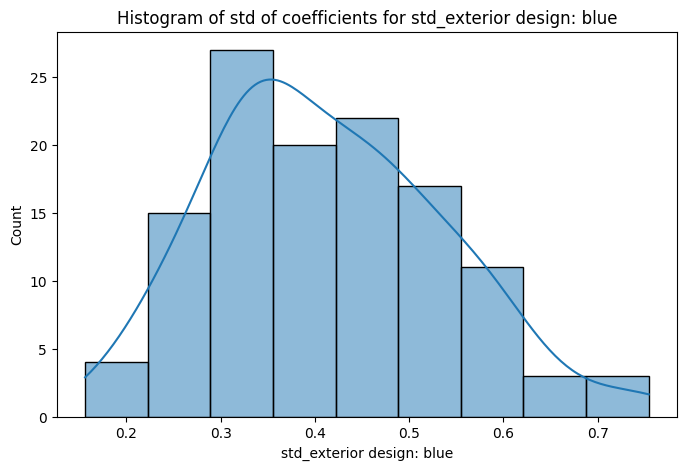

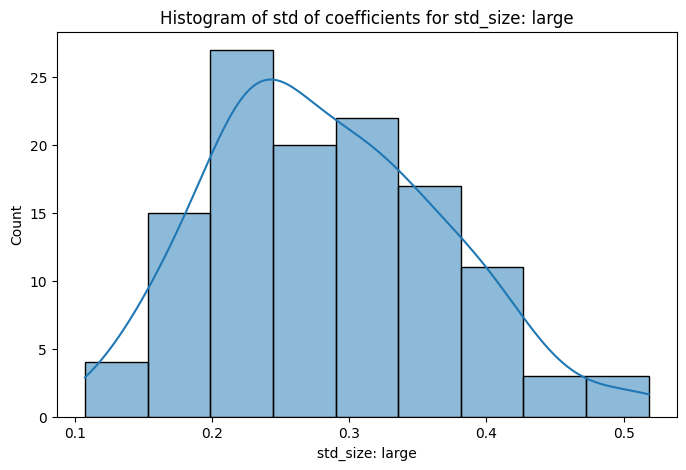

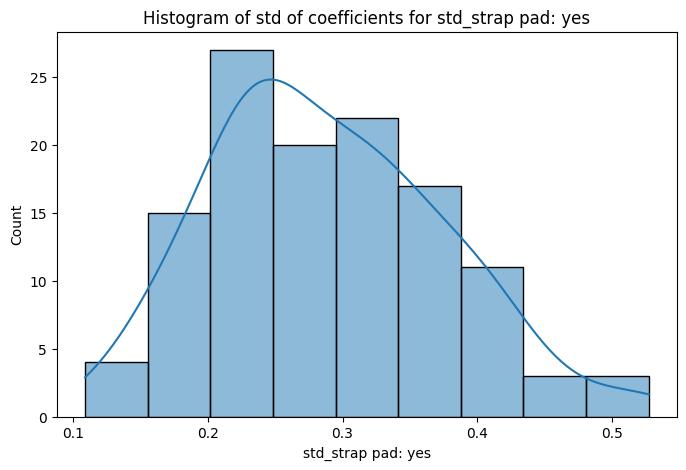

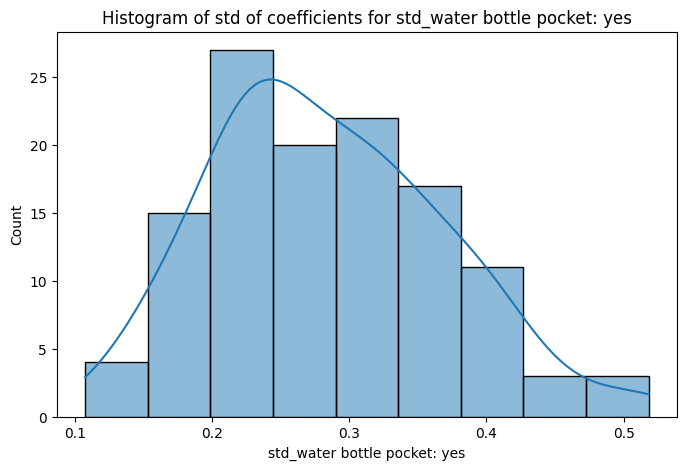

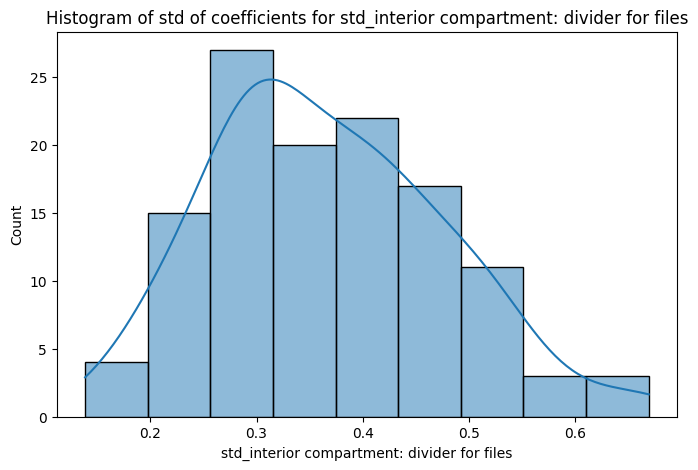

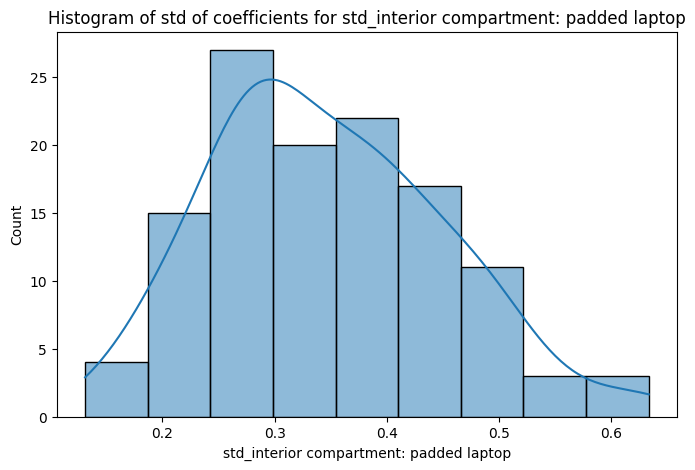

In [68]:
for col in Individual_level_std.columns:
    sns.histplot(Individual_level_std[col], kde=True)
    plt.title(f'Histogram of std of coefficients for {col}')
    plt.show()

In [69]:
# Summarization and taking the mean (examples)

print("Average coef on price", Individual_level_params['price'].mean())
print("Average coef on prie", Individual_level_params['exterior design: colorful'].mean())

Average coef on price -0.011146358764186619
Average coef on prie -1.064194514501884


A low standard deviation for any attribute indicates that most participants rate it about the same. A high standard deviation indicates significant differences in tastes. The histograms on std show well the average of std of coefficients (the peak of the distrubution line). In our case std is quite high for any feature, it shows us that among our sample the preferences are heterogeneous.

For each attribute level, I plotted the coefficient histograms for all respondents. This gave me how the preferences of the participants are distributed. If the distribution is highly stretched or has several peaks, this indicates heterogeneity in preferences. We can see that 'colorful', for example, has two peaks which are separated by some other data. Moreover, the histograms are quite stretched with two peaks in some cases. It allows us to suppose that the group (a sample of people) was at least quite heterogeneous.

it is easy to notice that the average of all the individuals coefficients by one feature is equal to the result form the regression on the all sample objects.

### Revenue-maximizing strategies

####  Revenue-maximizing configuration

In this simple case we assume that $u_{ij} = \hat{\beta}^{OLS}_i x_j$ - utility and that user $i$ will buy the bag $j$ if $\hat{\beta}^{OLS}_i x_j >= 3$. 3 is the most logical constant in this case because it is the nearest number more than the mean of the possible rates. 

In [70]:
# For each configuration of the bag we calculate the total revenue and find the maximum

all_bags = list(it.product([1, 2, 3, 4], [1, 2], [1, 2, 3, 4], 
               [1, 2], [1, 2], [1, 2, 3])) # all possible allocations
all_bags_df = pd.DataFrame(all_bags, columns=columns)
all_bags_full = sm.add_constant(get_dummies_and_price(all_bags_df))

In [71]:
def max_revenue_bag(coeffs: pd.DataFrame, bags: pd.DataFrame, threshold: float) -> tuple:
    res = coeffs.to_numpy() @ bags.to_numpy().T # shape N * all bags combinations
    mask = res >= threshold  # dummy by threshold
    revenues = np.sum(mask, axis = 0) * bags['price'].to_numpy()
    index = revenues.argmax()
    max_revenue = revenues[index]   
    return (index, max_revenue)

In [72]:
index_online, max_revenue_online = max_revenue_bag(Individual_level_params, all_bags_full, 3)
print(f'Max revenue for online: {max_revenue_online}')
print(all_bags_full.loc[index_online])

Max revenue for online: 15840
const                                        1.0
price                                      160.0
exterior design: reflective                  0.0
exterior design: colorful                    0.0
exterior design: blue                        0.0
size: large                                  1.0
strap pad: yes                               1.0
water bottle pocket: yes                     1.0
interior compartment: divider for files      0.0
interior compartment: padded laptop          1.0
Name: 83, dtype: float64


We use the approach which takes into account individual preferences rather than the one which uses the average coefficient for the entire market (the second strategy to determine the most beneficial configuration in the seminar). The advantages of the approach we realized are that it allows you to accurately model each user's preferences, which can lead to more personalized recommendations (which is better if we are talking about people with heterogeneous preferences). Therefore, if the market is diverse and includes different segments with different preferences, this approach will allow us to more accurately meet the needs of each group, and individual preferences will provide more accurate forecasts and help us choose the products that will bring the most income, which is better suited for the task of optimizing income. Therefore, as I've seen above that preferences of individuals are distributed quite extended with multiple peaks (two peaks - I reckon that if there isn't a highly prominent peak, then we can talk about multiple peaks in preferences), I've decided to use this approach to solve the given problem.

The most important features by this approach are the ones with 1 (which are the configuration points which maximize revenue given this approach). As expected, the color is black. Surprisingly, the price is not the lowest to attract more customers, however, it can be explained in terms of the reason that people prefer to buy things in the middle price range, becuase they often believe that this gives the maximum value for money. Additional features of a bag such as the presense of water bottle pocket and large size are also presented because they provide more comfort and convenience for customers. However, the divider for files is zero. It can be explained as insufficient increase for the invested sources and heterogeneous preferences on this feature (two peaks in the distribution). 

####  Revenue-maximizing product line of two bags

$u_{ij} = \hat{\beta}^{OLS}_i x_j$, where $i$ - respondent, $j$ - bag.

***Assumptions for product line of two bags:***

1) $u_{i1} > 3$ and $u_{i1} > u_{i2}$. Then the i-th customer chooses the 1 bag.

2) $u_{i2} > 3$ and $u_{i2} > u_{i1}$. Then the i-th customer chooses the 2 bag.

3) Otherwise the customer chooses not to buy anything.

In [73]:
all_bags = list(it.product([1, 2, 3, 4], [1, 2], [1, 2, 3, 4], [1, 2], [1, 2], [1, 2, 3]))
all_bags_df = pd.DataFrame(all_bags, columns=columns)
all_bags_full = sm.add_constant(get_dummies_and_price(all_bags_df)) 

def max_revenue_product_line(coeffs: pd.DataFrame, bags: pd.DataFrame, threshold: float, n: int) -> tuple:
    bag_combinations = list(it.combinations(range(len(bags)), n)) # all possible combinations of two bags
    max_revenue = 0
    best_combination = None

    for item in bag_combinations:
        selected_bags = bags.iloc[list(item)].to_numpy()
        res = coeffs.to_numpy() @ selected_bags.T 
        
        chosen_bags = np.max(res, axis=1) >= threshold  # res[i, j] contains the usefulness of respondent i for bag j, so the lines (axis=1) correspond to a set of utilities for all bags of one respondent
        chosen_indices = np.argmax(res, axis=1) # find the bag indices that give the maximum utility for each respondent in the current combination

        revenue = 0
        for i, mask in enumerate(chosen_bags):
            if mask:  # If buying
                chosen_bag_idx = chosen_indices[i]
                bag_price = selected_bags[chosen_bag_idx, bags.columns.get_loc('price')]
                revenue += bag_price

        if revenue > max_revenue: # check if this combination has the highest revenue
            max_revenue = revenue 
            best_combination = item
    
    return best_combination, max_revenue

best_comb, max_revenue = max_revenue_product_line(Individual_level_params, all_bags_full, 3, 2)

print(f"Max revenue for online: {max_revenue}\n")
for index in best_comb:
    print(all_bags_full.iloc[index], "\n")


Max revenue for online: 18020.0

const                                        1.0
price                                      180.0
exterior design: reflective                  0.0
exterior design: colorful                    0.0
exterior design: blue                        0.0
size: large                                  1.0
strap pad: yes                               1.0
water bottle pocket: yes                     1.0
interior compartment: divider for files      0.0
interior compartment: padded laptop          1.0
Name: 95, dtype: float64 

const                                        1.0
price                                      140.0
exterior design: reflective                  0.0
exterior design: colorful                    0.0
exterior design: blue                        1.0
size: large                                  1.0
strap pad: yes                               0.0
water bottle pocket: yes                     1.0
interior compartment: divider for files      0.0
interior 

Find the revenue-maximizing product line of two bags:

As we can see, these bags have many differences to satisfy as much demand as possible in terms of customer's preferences. As we've noticed before, the preferences are distributed widely, so in order to satisfy the demand for those who are not in the highest peak or near it, the bags are with different characterictics and different price level which provide maximum income in given conditions.

### OLS Estimations offline

#### 1) For all users

In [74]:
# Run regression over all objects - estimation of the population average partworths using OLS

X_offline = offline.drop(['rate', 'respondent', 'bag'], axis=1)
y_offline = offline['rate']

model = sm.OLS(y_offline, sm.add_constant(X_offline))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     57.96
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.03e-96
Time:                        23:37:16   Log-Likelihood:                -3883.5
No. Observations:                2440   AIC:                             7787.
Df Residuals:                    2430   BIC:                             7845.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

As we can see above, all the coefficients are significant except for exterior design: blue (p-values are less than 0.05). We can suppose that offline customers have more smoothed color preferences. We can highlight the properties of a bag which statistically positively affect the rating: with strap pad, with water bottle pocket, with divider for files, and with padding for a laptop. It is not surprising because this features increase the comfort of using a bag. Consumers prefer black bags and are sensitive to price increases. It is also quite intuitive because people tend to wear things in neutral tones such as black, white or gray and not to spend a lot of money on not too important thongs. 

Comparison with the online case:

Online: The price has a stronger negative impact on the rating (-0.0111) than with offline purchases (-0.0076). It can be explained that online shoppers seem to be more sensitive to price changes, perhaps due to easier access to price comparisons and discounts which may increase price awareness. In contrast, offline buyers may be more willing to pay higher prices due to the possibility of physical inspection of goods, which increases the perceived value of a good.

Online: Larger bags increase the rating (0.2680), while the offline rating decreases (-0.3074). The convenience of larger sizes is more appreciated online, where shoppers may assume they need more space when they buy discreetly. However, when offline, a large bag may seem bulky, and consumers can directly find out the size, preferring compact options if the bag seems too bulky to them. This highlights the importance of visual effect and practical considerations.

Offline: Functional features offline have smaller coefficient because offline customers value more the texture, the material (by tactile features), and real looking of a product which can be different (better looking) online. However, offline customers value more padding for a laptop, probably because they can physically test the product and check if this will be suitable for their laptop.

#### 2) For individual 

In [75]:
# Run regressions for each individual -  estimations of the individual online partworths

Individual_level_OLS_f = [] # list for OLS result for each respondent

respondents_f = offline.respondent.unique()
Individual_level_OLS_f = {}

for respondent in respondents_f:
    X = X_offline[offline.respondent == respondent] # choose the needed respondent lines in the dataset
    y = y_offline[offline.respondent == respondent]
    model = sm.OLS(y, sm.add_constant(X))
    results = model.fit()
    Individual_level_OLS_f[respondent] = results

In [76]:
# Computing metrics to analyze

# Individual_level_params is a table with coefficients for each respondent. 
# Individual_level_std is a table with standard errors for each respondent's coefficients (partworths)

Individual_level_params_f = pd.DataFrame(index = respondents_f, 
                                       columns = ['const'] + X_online.columns.tolist()) # creating null dataframe

Individual_level_std_f = pd.DataFrame(index = respondents_f, 
                                       columns = ['std_const'] + (['std_'] + X_online.columns).tolist())

for respondent in respondents_f:
    Individual_level_params_f.loc[respondent] = Individual_level_OLS_f[respondent].params  # get params
    Individual_level_std_f.loc[respondent] = Individual_level_OLS_f[respondent].bse.tolist() # get params std 

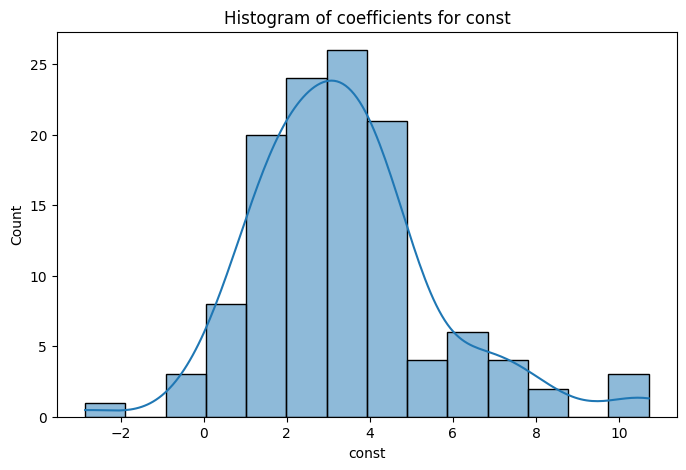

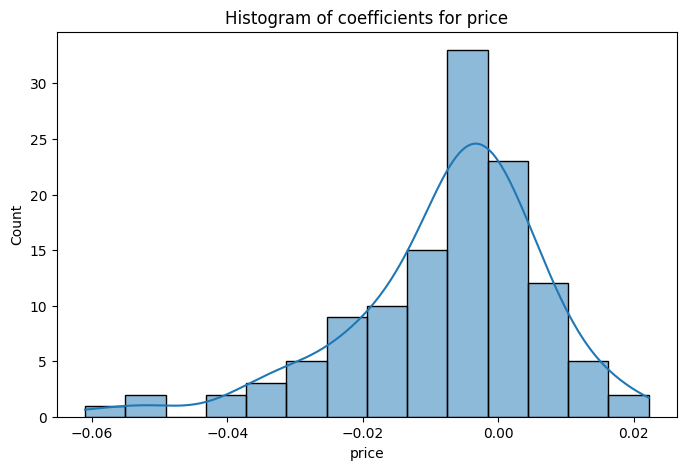

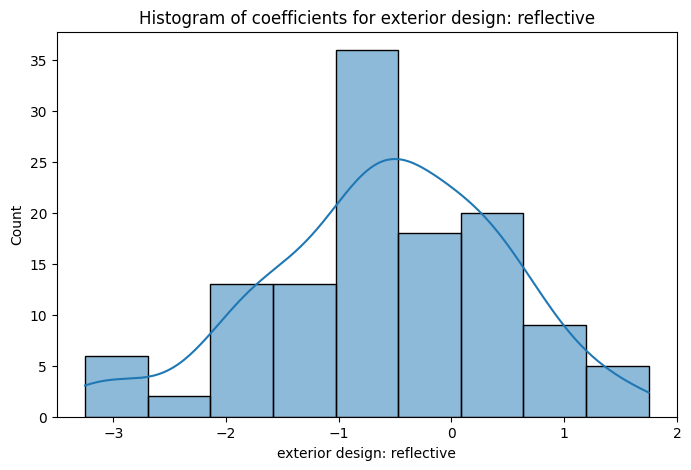

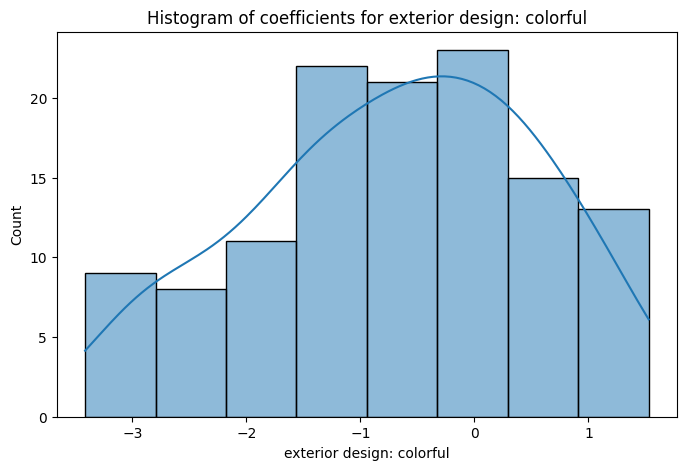

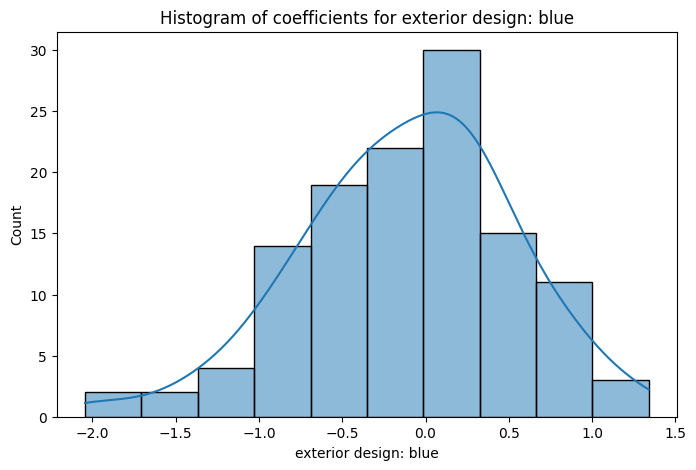

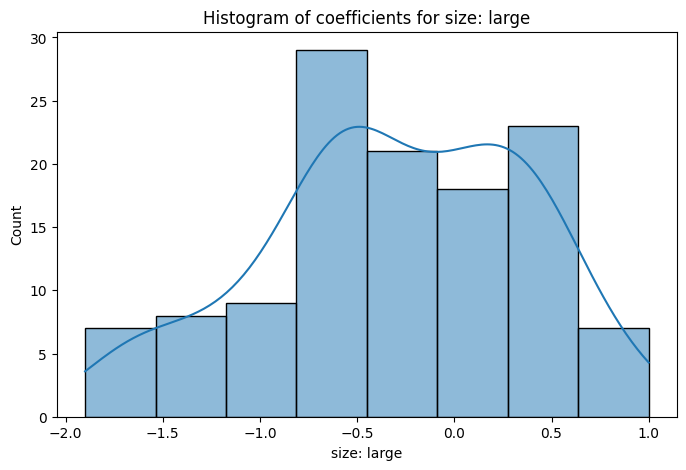

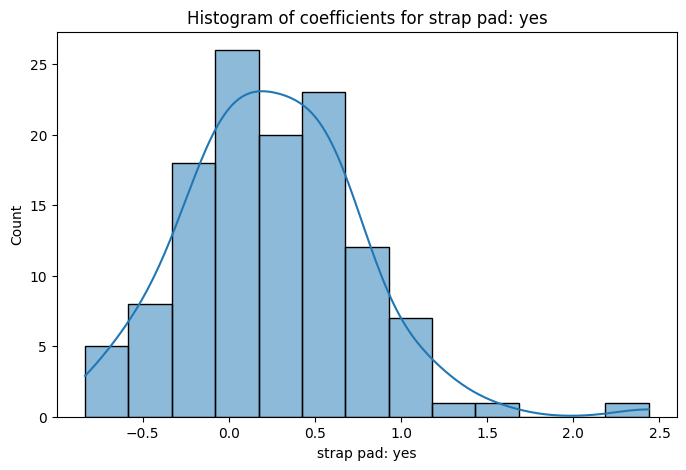

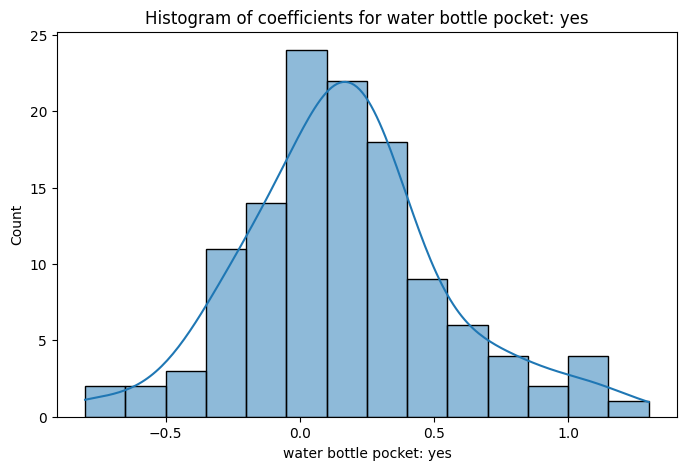

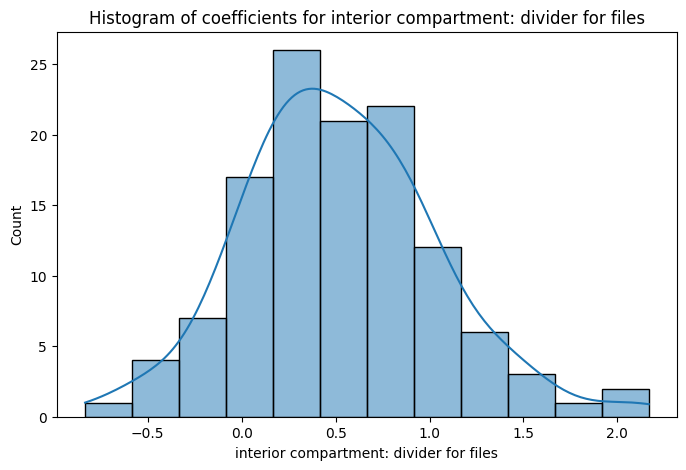

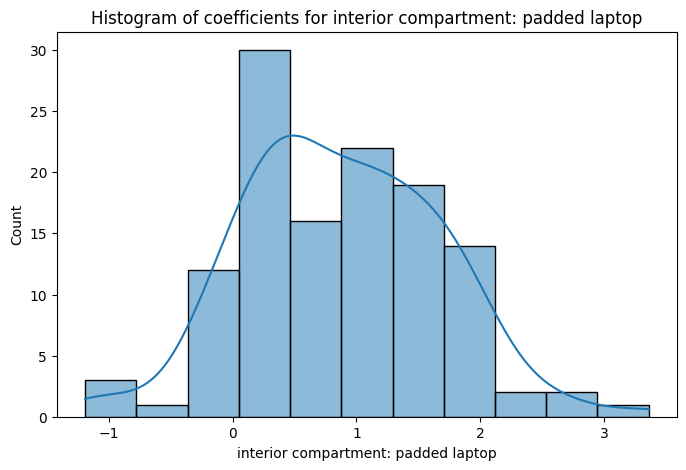

In [77]:
for col in Individual_level_params_f.columns:
    sns.histplot(Individual_level_params_f[col], kde=True)
    plt.title(f'Histogram of coefficients for {col}')
    plt.show()

As we can see, the distribution here are more stretched that for the online case. Therefore, the difference betweeen preferences of the customers is larger for offline ones. The online users are more standardized because they get quite the same experience from the website with pre-defined by programmists points of interest. Also, for online customers only visual infirmation is available, which makes these people quite similar (in comparison with offline customers which get much more information about goods). Therefore, the preferences of offline customers seem to be more heterogeneous. 

### Revenue-maximizing strategies

In this simple case we assume that $u_{ij} = \hat{\beta}^{OLS}_i x_j$ - utility and that user $i$ will buy the bag $j$ if $\hat{\beta}^{OLS}_i x_j >= 3$.

In [78]:
all_bags = list(it.product([1, 2, 3, 4], [1, 2], [1, 2, 3, 4], 
               [1, 2], [1, 2], [1, 2, 3]))
all_bags_df = pd.DataFrame(all_bags, columns=columns)
all_bags_full = sm.add_constant(get_dummies_and_price(all_bags_df))

index_offline, max_revenue_offline = max_revenue_bag(Individual_level_params_f, all_bags_full, 3)
print(f'Max revenue for offline: {max_revenue_offline}')
print(all_bags_full.loc[index_offline])

Max revenue for offline: 14040
const                                        1.0
price                                      180.0
exterior design: reflective                  0.0
exterior design: colorful                    0.0
exterior design: blue                        0.0
size: large                                  0.0
strap pad: yes                               1.0
water bottle pocket: yes                     1.0
interior compartment: divider for files      0.0
interior compartment: padded laptop          1.0
Name: 47, dtype: float64


Analyzing these results, we can notice that offline shoppers do not care about the price so much as online do. Therefore, the price is higher to maximize the profit. Moreover, large value is zero, according to the thoughts in the previous point where I compare online and offline features. However, the profit is smaller becuase online shopping is more affordable (using real-world sense) and that offline customers are more demanding (due to the fact that they estimate a good with more criterias such as smell, tactile sensations, and etc). And, finally, we can say that offline customers value the same additional options of bags as online customers do because the scope of application of this product is quite limited (in terms of comfort and convenient usage). 